# **Лабораторная работа №1: Основы Python и работа с данными с помощью Pandas**

*   **Цель:** Освоить базовый синтаксис Python и научиться манипулировать данными в табличном формате с использованием библиотеки Pandas — это главный инструмент любого специалиста по данным.
*   **Задание:** Взять готовый набор данных (CSV-файл), например, данные о пассажирах "Титаника". Провести первичный анализ: загрузить данные, посчитать основные статистики (средний возраст, количество выживших), отфильтровать данные по разным критериям (например, найти всех несовершеннолетних пассажиров первого класса), заполнить пропущенные значения и сохранить очищенный набор данных в новый файл.
*   **Ключевые навыки:** Основы Python (переменные, типы данных, циклы, функции), работа с библиотекой Pandas (DataFrame, Series), чтение/запись файлов, очистка и предварительная обработка данных.

### **Теоретический материал к Лабораторной работе №1**

**Тема: "Выживший детектив: первое погружение в анализ данных с Python и Pandas"**

Привет, будущий исследователь данных!

Прежде чем мы приступим к нашему расследованию данных "Титаника", тебе нужно освоить инструментарий настоящего дата-детектива. Сегодня мы изучим основы работы с библиотекой **Pandas** — швейцарским ножом для любого, кто работает с данными в Python. Она позволяет легко загружать, очищать, преобразовывать и анализировать табличные данные.

#### **1. Что такое Pandas и DataFrame?**

Представь, что у тебя есть огромная таблица в Excel. Работать с ней вручную, особенно если там тысячи или миллионы строк, очень неудобно. **Pandas** — это библиотека, которая позволяет делать всё то же самое, что и в Excel, и даже гораздо больше, но с помощью кода.

Главный объект, с которым мы будем работать в Pandas, — это **DataFrame**.

**DataFrame** — это, по сути, та самая таблица. У нее есть строки и столбцы, у каждого столбца есть имя. Это как "умная" таблица, которой можно давать команды: "покажи мне только пассажиров 1-го класса", "посчитай средний возраст для мужчин и женщин отдельно", "заполни все пустые ячейки".

Чтобы начать работу, нам нужно импортировать библиотеку и загрузить наши данные из файла `titanic.csv` в DataFrame.

```python
# Импортируем библиотеку, давая ей короткое и общепринятое имя 'pd'
import pandas as pd

# Читаем данные из CSV-файла в DataFrame
# Файл должен лежать в той же папке, что и ваш код, или нужно указать полный путь
df = pd.read_csv('titanic.csv')
```

После этого вся наша таблица будет храниться в переменной `df`.

#### **2. Первый осмотр "места преступления": как изучить данные**

Когда детектив прибывает на место, он сначала осматривается. В анализе данных — то же самое. Прежде чем делать выводы, нужно понять, с чем мы имеем дело. Для этого есть несколько базовых команд:

*   `df.head()`: Показывает первые 5 строк таблицы. Помогает быстро понять, какие у нас есть столбцы и как выглядят данные.
*   `df.info()`: Дает техническую сводку по таблице: сколько всего строк, есть ли пропущенные значения (очень важно!), какие типы данных в каждом столбце (число, строка и т.д.).
*   `df.describe()`: Показывает основные статистические метрики для всех числовых столбцов: количество, среднее, стандартное отклонение, минимум, максимум и медиану (50%). Это помогает быстро оценить разброс и масштаб значений.

#### **3. Алгоритмы очистки данных: работаем с "грязными" уликами**

Реальные данные почти никогда не бывают идеальными. В них часто встречаются пропуски, ошибки или неоптимальный формат. Наша задача — привести их в порядок.

##### **3.1. Алгоритм импутации (заполнения пропусков)**

В нашем датасете в столбце `Age` (возраст) есть пропуски. Мы не можем просто удалить строки с пропусками, так как потеряем ценную информацию. Вместо этого мы можем **импутировать** — то есть заполнить их наиболее вероятным значением.

*   **Простой способ:** Заполнить все пропуски средним (`.mean()`) или медианным (`.median()`) значением по всему столбцу.
    *   *В чем разница?* Среднее арифметическое чувствительно к выбросам (например, если у нас один пассажир возрастом 100 лет, это сильно сдвинет среднее). **Медиана** — это значение, которое находится ровно посередине отсортированного списка. Она более устойчива к выбросам, поэтому в анализе данных её часто предпочитают.

*   **Продвинутый способ (контекстуальный):** Подумать логически. Мог ли возраст зависеть от других факторов? Вероятно, да. Например, у пассажиров 1-го класса в среднем мог быть другой возраст, чем у пассажиров 3-го. Алгоритм будет таким:
    1.  Сгруппировать пассажиров по классу и полу.
    2.  Для каждой группы рассчитать медианный возраст.
    3.  Заполнить пропуски в возрасте, используя медиану именно той группы, к которой относится пассажир.
    Это гораздо точнее, чем просто брать общую медиану.

##### **3.2. Алгоритм Feature Engineering (создание новых признаков)**

Иногда существующие данные не дают полного ответа. Но из них можно создать новые, более информативные признаки (features). Этот процесс называется **Feature Engineering**.

*   **Пример: Категоризация.** Столбец `Age` содержит точные числовые значения. Но для анализа выживаемости нам может быть важнее не точный возраст, а возрастная группа: "ребенок", "взрослый", "пожилой". Мы можем написать небольшую функцию на Python и применить ее к каждой строке столбца `Age` с помощью метода `.apply()`.

    ```python
    # Пример функции
    def get_age_group(age):
        if age < 18:
            return "Ребенок"
        # ... и так далее

    # Создание нового столбца на основе старого
    df['AgeGroup'] = df['Age'].apply(get_age_group)
    ```
    Теперь мы можем анализировать данные в разрезе этих удобных категорий.

#### **4. Алгоритмы поиска закономерностей**

Когда данные очищены, начинается самое интересное — поиск скрытых историй.

##### **4.1. Алгоритм группировки "Split-Apply-Combine"**

Это один из самых мощных инструментов анализа. Его суть проста и элегантна:

1.  **Split (Разделение):** Мы делим всю нашу большую таблицу на несколько маленьких групп на основе какого-то критерия. Например, на группу "Мужчины" и группу "Женщины".
2.  **Apply (Применение):** К каждой из этих групп мы применяем какую-то операцию. Например, для каждой группы считаем среднее значение в столбце "Выжил".
3.  **Combine (Объединение):** Результаты для каждой группы собираются в новую, итоговую таблицу.

В Pandas за это отвечает метод `.groupby()`. Он позволяет нам отвечать на вопросы вроде: "Каков процент выживших среди мужчин и женщин?", "Как зависел шанс выжить от класса каюты?".

```python
# Пример: считаем средний процент выживших для каждого пола
# 1. Split: данные делятся на группы по значениям в столбце 'Sex'
# 2. Apply: для каждой группы берется столбец 'Survived' и считается среднее (.mean())
# 3. Combine: результаты объединяются в новую таблицу
df.groupby('Sex')['Survived'].mean()
```

##### **4.2. Алгоритмы фильтрации и сортировки**

Часто нам нужно не просто смотреть на агрегированные данные, а находить конкретных "персонажей" нашего расследования.

*   **Фильтрация (поиск):** Позволяет выбрать из таблицы только те строки, которые удовлетворяют определенному условию. Например, найти всех пассажиров, которые сели в порту "S" и заплатили за билет больше 50.

    ```python
    # Условие заключается в квадратные скобки
    # & означает "И", | означает "ИЛИ"
    df_filtered = df[(df['Embarked'] == 'S') & (df['Fare'] > 50)]
    ```

*   **Сортировка:** Позволяет упорядочить данные по одному или нескольким столбцам. Это полезно, чтобы найти "самых-самых": самого старого пассажира, самый дорогой билет и т.д. За это отвечает метод `.sort_values()`.

### **Теоретический материал к Лабораторной работе №1**

**Тема: "Выживший детектив: первое погружение в анализ данных с Python и Pandas"**

Привет, будущий исследователь данных!

Прежде чем мы приступим к нашему расследованию данных "Титаника", тебе нужно освоить инструментарий настоящего дата-детектива. Сегодня мы изучим основы работы с библиотекой **Pandas** — швейцарским ножом для любого, кто работает с данными в Python. Она позволяет легко загружать, очищать, преобразовывать и анализировать табличные данные.

#### **1. Что такое Pandas и DataFrame?**

Представь, что у тебя есть огромная таблица в Excel. Работать с ней вручную, особенно если там тысячи или миллионы строк, очень неудобно. **Pandas** — это библиотека, которая позволяет делать всё то же самое, что и в Excel, и даже гораздо больше, но с помощью кода.

Главный объект, с которым мы будем работать в Pandas, — это **DataFrame**.

**DataFrame** — это, по сути, та самая таблица. У нее есть строки и столбцы, у каждого столбца есть имя. Это как "умная" таблица, которой можно давать команды: "покажи мне только пассажиров 1-го класса", "посчитай средний возраст для мужчин и женщин отдельно", "заполни все пустые ячейки".

Чтобы начать работу, нам нужно импортировать библиотеку и загрузить наши данные из файла `titanic.csv` в DataFrame.

In [1]:
# Импортируем библиотеку, давая ей короткое и общепринятое имя 'pd'
import pandas as pd

# Читаем данные из CSV-файла в DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

#### **2. Первый осмотр "места преступления": как изучить данные**

Когда детектив прибывает на место, он сначала осматривается. В анализе данных — то же самое. Прежде чем делать выводы, нужно понять, с чем мы имеем дело. Для этого есть несколько базовых команд:

* `df.head()`: Показывает первые 5 строк таблицы. Помогает быстро понять, какие у нас есть столбцы и как выглядят данные.
* `df.info()`: Дает техническую сводку по таблице: сколько всего строк, есть ли пропущенные значения (очень важно!), какие типы данных в каждом столбце (число, строка и т.д.).
* `df.describe()`: Показывает основные статистические метрики для всех числовых столбцов: количество, среднее, стандартное отклонение, минимум, максимум и медиану (50%). Это помогает быстро оценить разброс и масштаб значений.

#### **3. Алгоритмы очистки данных: работаем с "грязными" уликами**

Реальные данные почти никогда не бывают идеальными. В них часто встречаются пропуски, ошибки или неоптимальный формат. Наша задача — привести их в порядок.

##### **3.1. Алгоритм импутации (заполнения пропусков)**

В нашем датасете в столбце `Age` (возраст) есть пропуски. Мы не можем просто удалить строки с пропусками, так как потеряем ценную информацию. Вместо этого мы можем **импутировать** — то есть заполнить их наиболее вероятным значением.

* **Простой способ:** Заполнить все пропуски средним (`.mean()`) или медианным (`.median()`) значением по всему столбцу.
  * *В чем разница?* Среднее арифметическое чувствительно к выбросам (например, если у нас один пассажир возрастом 100 лет, это сильно сдвинет среднее). **Медиана** — это значение, которое находится ровно посередине отсортированного списка. Она более устойчива к выбросам, поэтому в анализе данных её часто предпочитают.
* **Продвинутый способ (контекстуальный):** Подумать логически. Мог ли возраст зависеть от других факторов? Вероятно, да. Например, у пассажиров 1-го класса в среднем мог быть другой возраст, чем у пассажиров 3-го. Алгоритм будет таким:
  1. Сгруппировать пассажиров по классу и полу.
  2. Для каждой группы рассчитать медианный возраст.
  3. Заполнить пропуски в возрасте, используя медиану именно той группы, к которой относится пассажир.
Это гораздо точнее, чем просто брать общую медиану.

##### **3.2. Алгоритм Feature Engineering (создание новых признаков)**

Иногда существующие данные не дают полного ответа. Но из них можно создать новые, более информативные признаки (features). Этот процесс называется **Feature Engineering**.

* **Пример: Категоризация.** Столбец `Age` содержит точные числовые значения. Но для анализа выживаемости нам может быть важнее не точный возраст, а возрастная группа: "ребенок", "взрослый", "пожилой". Мы можем написать небольшую функцию на Python и применить ее к каждой строке столбца `Age` с помощью метода `.apply()`.

  Теперь мы можем анализировать данные в разрезе этих удобных категорий.

In [2]:
# Пример функции
def get_age_group(age):
    if age < 18:
        return "Ребенок"
    # ... и так далее

# Создание нового столбца на основе старого
df['AgeGroup'] = df['Age'].apply(get_age_group)

#### **4. Алгоритмы поиска закономерностей**

Когда данные очищены, начинается самое интересное — поиск скрытых историй.

##### **4.1. Алгоритм группировки "Split-Apply-Combine"**

Это один из самых мощных инструментов анализа. Его суть проста и элегантна:

1. **Split (Разделение):** Мы делим всю нашу большую таблицу на несколько маленьких групп на основе какого-то критерия. Например, на группу "Мужчины" и группу "Женщины".
2. **Apply (Применение)::** К каждой из этих групп мы применяем какую-то операцию. Например, для каждой группы считаем среднее значение в столбце "Выжил".
3. **Combine (Объединение)::** Результаты для каждой группы собираются в новую, итоговую таблицу.

В Pandas за это отвечает метод `.groupby()`. Он позволяет нам отвечать на вопросы вроде: "Каков процент выживших среди мужчин и женщин?", "Как зависел шанс выжить от класса каюты?".

In [3]:
# Пример: считаем средний процент выживших для каждого пола
# 1. Split: данные делятся на группы по значениям в столбце 'Sex'
# 2. Apply: для каждой группы берется столбец 'Survived' и считается среднее (.mean())
# 3. Combine: результаты объединяются в новую таблицу
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

##### **4.2. Алгоритмы фильтрации и сортировки**

Часто нам нужно не просто смотреть на агрегированные данные, а находить конкретных "персонажей" нашего расследования.

* **Фильтрация (поиск):** Позволяет выбрать из таблицы только те строки, которые удовлетворяют определенному условию. Например, найти всех пассажиров, которые сели в порту "S" и заплатили за билет больше 50.

* **Сортировка:** Позволяет упорядочить данные по одному или нескольким столбцам. Это полезно, чтобы найти "самых-самых": самого старого пассажира, самый дорогой билет и т.д. За это отвечает метод `.sort_values()`.

In [4]:
# Условие заключается в квадратные скобки
# & означает "И", | означает "ИЛИ"
df_filtered = df[(df['Embarked'] == 'S') & (df['Fare'] > 50)]

### **Лабораторная работа №1: Практические задания**

**Тема: "Выживший детектив: первое погружение в анализ данных с Python и Pandas"**

**Цель:** Используя данные о пассажирах "Титаника", провести расследование: очистить "улики", найти скрытые закономерности и ответить на вопросы о факторах, повлиявших на выживание.

#### **Часть 1: Загрузка улик и первый осмотр**

Эти задачи обязательны для всех. Они познакомят вас с базовым синтаксисом и основными командами для "осмотра" данных.

*   **Задание 1.1:** Импортируйте библиотеку `pandas` под общепринятым псевдонимом `pd`.
*   **Задание 1.2:** Прочитайте файл `titanic.csv` в DataFrame с именем `df`.
*   **Задание 1.3:** Проведите первичный осмотр данных:
    *   Выведите на экран первые 7 строк таблицы с помощью метода `.head()`.
    *   Используйте метод `.info()` для получения технической сводки о данных. **Запишите в комментарии к коду ответ: в каких столбцах есть пропущенные значения?**
    *   Используйте метод `.describe()` для получения статистической сводки. **Запишите в комментарии: какой был средний возраст пассажиров и максимальная цена за билет (`Fare`)?**

---

#### **Часть 2: Очистка данных и подготовка к анализу (Инженерия признаков)**

На этом этапе мы приведем "улики" в порядок. Здесь начинается настоящая детективная работа.

*   **Задание 2.1 (Обязательно для всех): Заполнение пропусков простым методом.**
    *   В столбце `Age` есть пропуски. Самый быстрый способ их закрыть — использовать общее для всех значение.
    *   **Задача:** Посчитайте **медианный** возраст всех пассажиров и заполните им все пропущенные значения в столбце `Age`.
    *   **Проверка:** Убедитесь, что в столбце `Age` больше нет пропусков, снова вызвав `.info()`.

*   **Задание 2.2 (Обязательно для всех): Написание собственного алгоритма категоризации.**
    *   Числовой возраст не всегда удобен для анализа. Гораздо показательнее анализировать выживаемость по возрастным группам.
    *   **Задача:**
        1.  **Напишите на Python функцию `get_age_group(age)` с использованием `def`.**
            *   Эта функция должна принимать на вход возраст (`age`).
            *   Алгоритм внутри функции: если возраст меньше 18, функция должна возвращать строку "Ребенок"; если возраст от 18 до 65 (включительно) — "Взрослый"; если старше 65 — "Пожилой".
        2.  Создайте в DataFrame новый столбец `AgeGroup`.
        3.  Примените вашу функцию `get_age_group` ко всему столбцу `Age` с помощью метода `.apply()` и сохраните результат в столбец `AgeGroup`.
    *   **Проверка:** Выведите первые 5 строк и убедитесь, что новый столбец появился и заполнен корректно.

*   **Задание 2.3 (Задание со звездочкой \* для продвинутых): Контекстное заполнение пропусков.**
    *   *Это задание выполняется ВМЕСТО задания 2.1. Если вы его делаете, не выполняйте простое заполнение медианой.*
    *   **Гипотеза:** Возраст людей сильно зависит от их социального статуса. Давайте заполним пропуски в возрасте не общей медианой, а более релевантным значением.
    *   **Задача:** Заполнить пропущенные значения в `Age` медианным возрастом, рассчитанным для каждой группы отдельно в зависимости от **пола** (`Sex`) и **класса каюты** (`Pclass`).
    *   **Подсказка:** Вам может понадобиться комбинация методов `.groupby()` и `.transform()`. Это сложная, но очень мощная техника!

---

#### **Часть 3: Поиск закономерностей и ответов на вопросы**

Теперь, когда данные чисты, мы можем начать "допрос" — задавать данным вопросы и получать ответы.

*   **Задание 3.1 (Обязательно для всех): Анализ выживаемости по полу и классу.**
    *   Используя алгоритм **Split-Apply-Combine** (метод `.groupby()`), найдите ответы на вопросы:
        1.  Какой процент мужчин и женщин выжил?
        2.  Какой процент пассажиров выжил в каждом из трех классов (`Pclass`)?
        3.  Создайте сводную таблицу, показывающую процент выживших в зависимости **одновременно** от пола и класса каюты.

*   **Задание 3.2 (Обязательно для всех): Фильтрация и сортировка.**
    *   Используя фильтрацию и сортировку, найдите:
        1.  Имена (столбец `Name`) всех несовершеннолетних (младше 18 лет) пассажиров, которые путешествовали в 3-м классе и выжили. Отсортируйте результат по возрасту в порядке убывания.
        2.  Самого пожилого мужчину на борту, который не выжил.

*   **Задание 3.3 (Задание со звездочкой \* для продвинутых): Анализ влияния размера семьи.**
    *   **Гипотеза:** Путешествующие в одиночку имели другие шансы на выживание, чем семейные пассажиры.
    *   **Задача:**
        1.  Создайте новый столбец `FamilySize`, который будет равен сумме значений в столбцах `SibSp` (братья/сестры/супруги) и `Parch` (родители/дети) плюс 1 (сам пассажир).
        2.  Создайте еще один столбец `IsAlone` (Одинок). Если `FamilySize` равен 1, значение в этом столбце должно быть 1, иначе — 0.
        3.  Используя `.groupby()`, сравните процент выживших среди одиноких пассажиров и тех, кто путешествовал с семьей. Сделайте вывод.

#### **Часть 4: Формулировка выводов**

В конце каждого расследования детектив составляет отчет. Основываясь на полученных в Части 3 результатах, письменно ответьте на следующие вопросы (в виде комментариев в коде или в отдельной ячейке Markdown, если вы работаете в Jupyter Notebook).

1.  Какой фактор — пол или класс каюты — оказывал большее влияние на выживаемость? Приведите цифры из вашего анализа.
2.  Подтверждает ли ваш анализ знаменитое правило "женщины и дети в первую очередь"? Ответ подкрепите данными по выживаемости в разных возрастных группах (`AgeGroup`) и по полу.

---

### **Часть 5: Контрольные вопросы для самопроверки**

Вы провели большое расследование! Теперь, как настоящему детективу, вам нужно доказать, что вы не просто следовали инструкциям, а действительно поняли суть дела. Ответьте на эти вопросы, чтобы проверить глубину вашего понимания.

#### **Блок 1: Основы Pandas и синтаксис**

1.  Что такое `DataFrame` и что такое `Series` в библиотеке Pandas? Приведите пример `Series` из нашего датасета "Титаника".
2.  В чем разница между методами `.info()` и `.describe()`? Какую информацию о пропущенных значениях дает каждый из них?
3.  Как выбрать несколько конкретных столбцов из DataFrame? Напишите пример кода, который выбрал бы только столбцы `Name`, `Age` и `Survived`.
4.  Объясните синтаксис фильтрации на примере: `df[df['Pclass'] == 3]`. Что здесь является логическим условием, а что — операцией выбора строк?

#### **Блок 2: Алгоритмы и обработка данных**

5.  **Ключевой вопрос:** Почему при заполнении пропусков в возрасте (`Age`) использование **медианы** часто предпочтительнее **среднего арифметического**? Какой недостаток есть у среднего значения?
6.  Объясните по шагам логику вашего собственного алгоритма — функции `get_age_group(age)`. Почему создание таких категорий (`Ребенок`, `Взрослый`) может быть полезнее для анализа, чем использование точного возраста?
7.  В чем заключается фундаментальный принцип работы алгоритма **"Split-Apply-Combine"**, который реализуется через метод `.groupby()`? Опишите каждый из трех шагов своими словами.
8.  **Вопрос для продвинутых (кто делал задание 2.3*):** Объясните, почему контекстное заполнение пропусков (на основе пола и класса) дает более точный и обоснованный результат, чем заполнение общей медианой по всей таблице?
9.  **Вопрос для продвинутых (кто делал задание 3.3*):** Зачем при создании столбца `FamilySize` мы прибавляли `1` к сумме `SibSp` и `Parch`? Что бы мы анализировали, если бы забыли это сделать?

#### **Блок 3: Интерпретация результатов и выводы**

10. Основываясь на ваших данных, кто имел больше шансов выжить: 5-летняя девочка из 3-го класса или 40-летний мужчина из 1-го класса? Подкрепите свой ответ цифрами, полученными с помощью `.groupby()`.
11. Ваш анализ показал, что пассажиры 1-го класса выживали чаще, чем пассажиры 3-го. Можно ли на основании **только этих данных** сделать однозначный вывод, что это произошло из-за их высокого социального статуса? Какие еще скрытые факторы могли на это повлиять? (Подсказка: подумайте о расположении кают).
12. Мы видим сильную связь (корреляцию) между полом и выживаемостью. Означает ли это, что пол был прямой **причиной** выживания? Объясните разницу между корреляцией и причинно-следственной связью в контексте нашего исследования.
13. Какой самый неожиданный или интересный вывод вы сделали для себя в ходе этой лабораторной работы?
14. Если бы вам нужно было построить простую модель, предсказывающую выживаемость, какие два столбца (признака) из всего датасета вы бы выбрали как самые важные? Почему?
15. Мы удалили столбец `Cabin` из-за большого количества пропусков. Как вы думаете, какую ценную информацию он мог бы содержать, если бы был полностью заполнен?

# 1

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

In [6]:
df.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [7]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


age, cabin, embarked

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


mean age: 30, max fear: 512

# 2

In [ ]:
def sex(sexx):
    if sexx == "male":
        return 1
    else:
        return 0

In [29]:
df["Sex"] = df["Sex"].apply(sex)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  AgeGroup     891 non-null    object 
 13  FamilySize   891 non-null    int64  
 14  IsAlone      891 non-null    int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 104.5+ KB


In [12]:
medians = df.groupby(["Pclass", "Sex"]).Age.aggregate("median")
def transform_age(row):
    if pd.isna(row["Age"]): 
        return medians[(row["Pclass"], row["Sex"])]
    else:
        return row["Age"]

In [13]:
df["Age"] = df.apply(transform_age, axis=1)

In [14]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,21.5,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [15]:
def get_age_group(age):
    if age < 18:
        return "child"
    elif 18 <= age < 65:
        return "adult"
    else:
        return "old"

In [16]:
df["AgeGroup"] = df["Age"].apply(get_age_group)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,adult


# 3

In [17]:
male_surv = df.groupby("Sex").Survived.aggregate("count")[1]
female_surv = df.groupby("Sex").Survived.aggregate("count")[0]
male_surv / len(df), female_surv / len(df)

(np.float64(0.6475869809203143), np.float64(0.35241301907968575))

In [18]:
class_1 = df.groupby("Pclass").Survived.aggregate("count")[1]
class_2 = df.groupby("Pclass").Survived.aggregate("count")[2]
class_3 = df.groupby("Pclass").Survived.aggregate("count")[3]
class_1 / len(df), class_2 / len(df), class_3 / len(df)

(np.float64(0.24242424242424243),
 np.float64(0.20650953984287318),
 np.float64(0.5510662177328844))

In [ ]:
sp = df.groupby(["Sex", "Pclass"]).Survived.sum().reset_index()
sp["proc"] = sp["Survived"] / len(df)
sp

,Sex,Pclass,Survived,proc
0,0,1,91,0.102132
1,0,2,70,0.078563
2,0,3,72,0.080808
3,1,1,45,0.050505
4,1,2,17,0.019080
5,1,3,47,0.052750


### Выживали мужчины из 3 класса

In [20]:
names = df[(df["AgeGroup"] == "child") & (df["Pclass"] == 3) & (df["Survived"] == 1)]
names.sort_values("Age")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
803,804,1,3,"Thomas, Master. Assad Alexander",1,0.42,0,1,2625,8.5167,NaN,C,child
644,645,1,3,"Baclini, Miss. Eugenie",0,0.75,2,1,2666,19.2583,NaN,C,child
469,470,1,3,"Baclini, Miss. Helene Barbara",0,0.75,2,1,2666,19.2583,NaN,C,child
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",0,1.00,0,2,2653,15.7417,NaN,C,child
788,789,1,3,"Dean, Master. Bertram Vere",1,1.00,1,2,C.A. 2315,20.5750,NaN,S,child
172,173,1,3,"Johnson, Miss. Eleanor Ileen",0,1.00,1,1,347742,11.1333,NaN,S,child
479,480,1,3,"Hirvonen, Miss. Hildur E",0,2.00,0,1,3101298,12.2875,NaN,S,child
348,349,1,3,"Coutts, Master. William Loch ""William""",1,3.00,1,1,C.A. 37671,15.9000,NaN,S,child
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",1,3.00,4,2,347077,31.3875,NaN,S,child
691,692,1,3,"Karun, Miss. Manca",0,4.00,0,1,349256,13.4167,NaN,C,child


In [22]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

df["IsAlone"] = (df["FamilySize"] == 1).astype(int)

survival_rates = df.groupby("IsAlone")["Survived"].mean().reset_index()
survival_rates["Survived"] *= 100  # проценты
survival_rates


,IsAlone,Survived
0,0,50.564972
1,1,30.353818


In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,adult,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,adult,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,adult,2,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,adult,1,1


<Axes: >

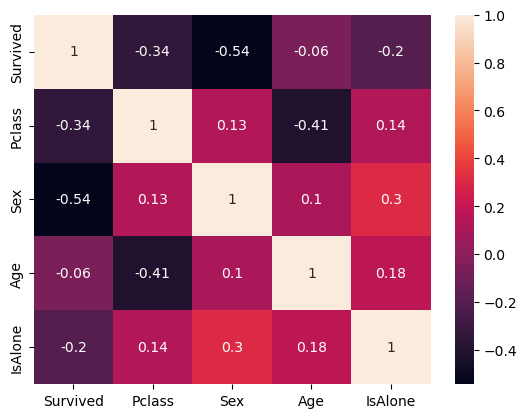

In [28]:
import seaborn as sns

sns.heatmap(df[["Survived", "Pclass", "Sex", "Age", "IsAlone"]].corr(), annot=True)